In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

names = {
    't': 'Latest: Time (s)',
    's1':'Latest: GateState 1',
    's2':'Latest: GateState 2'
}

masses = [
    [247.2,244.9], #1
    [247.2,344.5],
    [247.2,344.5],
    [247.2,344.5],
    [247.2,344.5], #5
    [247.2,245],
    [247.2,245],
    [347.1,245],
    [342,250.1],
    [342,250.1], #10
    [242.1,250.1],
    [242.1,250.1],
    [211.1,206.2],
    [211.1,206.2],
    [311.2,206.2], #15
    [311.2,206.2],
    [206.2,311.2],
    [206.2,311.2]
]

In [2]:
df = pd.read_csv(f'../data/partC/try{13}.csv')
df

,Latest: Time (s),Latest: Volume (mL),Latest: GateState 1,Latest: Distance 1 (m),Latest: Velocity 2 (m/s),Latest: Acceleration 2 (m/s²),Latest: GateState 2,Latest: Distance 2 (m),Latest: Velocity 1 (m/s),Latest: Acceleration 1 (m/s²)
0,11.942771,NaN,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,11.969241,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.000889,NaN,1.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN
3,12.027463,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.082696,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN,NaN
5,13.146204,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,13.214615,NaN,NaN,NaN,NaN,NaN,1.0,0.05,0.330895,-0.729617
7,13.278873,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,13.930091,NaN,NaN,NaN,NaN,NaN,1.0,0.10,0.313181,0.680100
9,13.997123,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


Interation, \Delta p, \Delta p %, \Delta T, \Delta T %
1,1.27,0.89,17.1,51.27
2,2.19,1.37,22.13,53.82
3,0.01,0.01,17.2,51.62
4,12.35,9.04,6.52,17.17
5,7.32,9.42,2.2,17.92
6,29.68,27.51,4.03,20.47
7,24.27,17.47,6.58,21.88
8,20.68,13.86,7.39,22.05
9,9.41,6.34,7.13,15.9
10,6.71,7.39,3.02,18.0


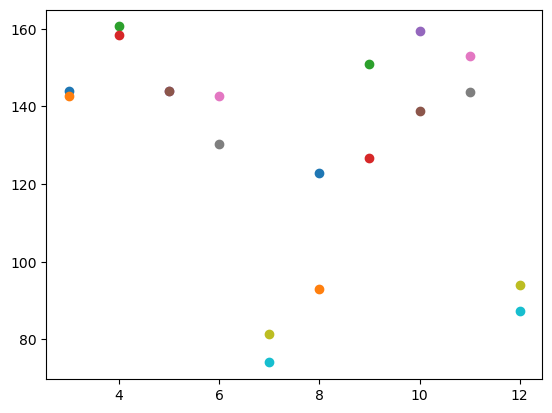

In [42]:
print('Interation, \Delta p, \Delta p %, \Delta T, \Delta T %')
for i in range(3,13):
    number = i
    
    df = pd.read_csv(f'../data/partC/try{number}.csv')
    
    m1 = masses[number-1][0]
    m2 = masses[number-1][1]
    l = 1e-2
    u1 = l/(df[names['t']][1] - df[names['t']][0])
    u2 = 0

    mu = (m1*m2)/(m1+m2)
    dke_eqn = 0.5*mu*(u1-u2)**2
    # print(mu)
    
    
    if number in [6,7,8,11,12]:
        v1 = 0
        v2 = l/(df[names['t']][5] - df[names['t']][4])
    elif number in [9,10]:
        v1 = l/(df[names['t']][9] - df[names['t']][8])
        v2 = l/(df[names['t']][5] - df[names['t']][4])
    elif number > 12:
        v1 = l/(df[names['t']][5] - df[names['t']][4])
        v2 = l/(df[names['t']][9] - df[names['t']][8])
        V = (v1+v2)/2
        
    else:
        v1 = l/(df[names['t']][5] - df[names['t']][4])
        v2 = l/(df[names['t']][9] - df[names['t']][8])

    pi = round(m1*u1 + m2*u2,2)
    ti = round(0.5*(m1*u1**2+m2*u2**2),2)
    
    if number > 12:
        pf = round((m1+m2)*V)
        tf = round(0.5*(m1+m2)*V**2)
        dke_obs = ti-tf
        
    else:
        pf = round(m1*v1 + m2*v2,2)
        tf = round(0.5*(m1*v1**2+m2*v2**2),2)

    plt.scatter(i,pi)
    plt.scatter(i,pf)

    abs_err = abs(dke_obs-dke_eqn)
    rel_err = 100*abs_err/dke_eqn

    abs_d_p = round(abs(pi-pf),2)
    rel_d_p = round(200*abs_d_p/(pi+pf),2)
    abs_d_t = round(abs(ti-tf),2)
    rel_d_t = round(200*abs_d_t/(ti+tf),2)

    print(f'{i-2},{abs_d_p},{rel_d_p},{abs_d_t},{rel_d_t}')
    # print(f'{i},{round(dke_obs,2)},{round(dke_eqn,2)}', round(abs_err,2), round(rel_err,2))
    # print(f"Attempt {number}\nm1={m1}, m2={m2}\nu1={round(u1,2)}, u2={round(u2,2)}\nv1={round(v1,2)}, v2={round(v2,2)}\nInitial momentum = {pi}, Final momentum = {pf}\nInitial energy = {ti}, Final energy = {tf}\n\n")

plt.show()